In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import mutual_info_regression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier
import statsmodels.api as sm
from itertools import combinations

df = pd.read_csv('matchups_20.csv')
df = df[df['round'] == 'First Round']
print(df.shape)
df.head()

(638, 35)


,year,region,round,high_bracket_seed,high_bracket_team,low_bracket_seed,low_bracket_team,win,kenpom_adjem,kenpom_adjoe,...,off_ft_pct,off_block_pct,def_2pt_pct,def_3pt_pct,def_ft_pct,def_block_pct,off_ast_rate,off_stl_rate,def_ast_rate,def_stl_rate
0,2004,East,First Round,1,2004 Saint Joseph's,16,2004 Liberty,1,30.51285,89.1570,...,33.5825,81.9021,5.4501,41.7977,-37.4861,-84.6118,13.7502,99.7470,-10.0856,-99.7788
7,2004,East,First Round,8,2004 Texas Tech,9,2004 Charlotte,1,1.43680,78.2630,...,46.4728,85.4281,1.6559,30.7079,-31.5219,-85.8576,9.5939,99.7903,-9.3661,-99.7883
8,2004,East,First Round,5,2004 Florida,12,2004 Manhattan,0,8.30760,83.7144,...,44.9368,80.9222,6.2776,30.4742,-43.2857,-79.8805,9.8626,99.8169,-4.0085,-99.7570
9,2004,East,First Round,4,2004 Wake Forest,13,2004 VCU,1,13.63448,86.9167,...,38.4915,86.3280,-0.2132,23.4719,-30.7271,-80.5975,8.2795,99.7662,-4.3055,-99.7956
10,2004,East,First Round,6,2004 Wisconsin,11,2004 Richmond,1,9.59540,74.4991,...,35.5797,84.1809,8.4736,35.7716,-41.9849,-79.0446,11.9216,99.7869,-2.7782,-99.8064


In [38]:
df['win'].value_counts(normalize=True)

1    0.725705
0    0.274295
Name: win, dtype: float64

In [39]:
df.columns

Index(['year', 'region', 'round', 'high_bracket_seed', 'high_bracket_team',
       'low_bracket_seed', 'low_bracket_team', 'win', 'kenpom_adjem',
       'kenpom_adjoe', 'kenpom_adjde', 'off_eff', 'def_eff', 'tempo',
       'adj_tempo', 'off_efg_pct', 'off_to_pct', 'off_or_pct', 'off_ft_rate',
       'def_efg_pct', 'def_to_pct', 'def_or_pct', 'def_ft_rate', 'off_2pt_pct',
       'off_3pt_pct', 'off_ft_pct', 'off_block_pct', 'def_2pt_pct',
       'def_3pt_pct', 'def_ft_pct', 'def_block_pct', 'off_ast_rate',
       'off_stl_rate', 'def_ast_rate', 'def_stl_rate'],
      dtype='object')

In [40]:
split_df = df.drop(['year', 'region', 'round', 'high_bracket_seed', 'high_bracket_team', 'low_bracket_seed', 'low_bracket_team'],axis=1)
print(split_df.shape)
split_df.head()

(638, 28)


,win,kenpom_adjem,kenpom_adjoe,kenpom_adjde,off_eff,def_eff,tempo,adj_tempo,off_efg_pct,off_to_pct,...,off_ft_pct,off_block_pct,def_2pt_pct,def_3pt_pct,def_ft_pct,def_block_pct,off_ast_rate,off_stl_rate,def_ast_rate,def_stl_rate
0,1,30.51285,89.1570,-58.6443,75.3604,-75.3604,-1.5585,-0.7522,3.4895,61.4038,...,33.5825,81.9021,5.4501,41.7977,-37.4861,-84.6118,13.7502,99.7470,-10.0856,-99.7788
7,1,1.43680,78.2630,-76.8259,71.9374,-71.9374,-2.5719,-2.9231,-3.0813,60.9730,...,46.4728,85.4281,1.6559,30.7079,-31.5219,-85.8576,9.5939,99.7903,-9.3661,-99.7883
8,0,8.30760,83.7144,-75.4066,81.7310,-81.7310,0.5867,0.8344,1.6693,54.9379,...,44.9368,80.9222,6.2776,30.4742,-43.2857,-79.8805,9.8626,99.8169,-4.0085,-99.7570
9,1,13.63448,86.9167,-73.2828,83.6630,-83.6630,5.5936,5.9343,-0.6875,60.0428,...,38.4915,86.3280,-0.2132,23.4719,-30.7271,-80.5975,8.2795,99.7662,-4.3055,-99.7956
10,1,9.59540,74.4991,-64.9044,73.7650,-73.7650,-3.3925,-2.4101,-5.1554,61.2769,...,35.5797,84.1809,8.4736,35.7716,-41.9849,-79.0446,11.9216,99.7869,-2.7782,-99.8064


In [41]:
split_df.columns

Index(['win', 'kenpom_adjem', 'kenpom_adjoe', 'kenpom_adjde', 'off_eff',
       'def_eff', 'tempo', 'adj_tempo', 'off_efg_pct', 'off_to_pct',
       'off_or_pct', 'off_ft_rate', 'def_efg_pct', 'def_to_pct', 'def_or_pct',
       'def_ft_rate', 'off_2pt_pct', 'off_3pt_pct', 'off_ft_pct',
       'off_block_pct', 'def_2pt_pct', 'def_3pt_pct', 'def_ft_pct',
       'def_block_pct', 'off_ast_rate', 'off_stl_rate', 'def_ast_rate',
       'def_stl_rate'],
      dtype='object')

In [42]:
X = split_df.drop('win', axis=1)
X = split_df[['kenpom_adjem', 'kenpom_adjoe', 'kenpom_adjde', 'off_eff',
       'def_eff', 'tempo', 'adj_tempo', 'off_efg_pct', 'off_to_pct',
       'off_or_pct', 'off_ft_rate', 'def_efg_pct', 'def_to_pct', 'def_or_pct',
       'def_ft_rate', 'off_2pt_pct', 'off_3pt_pct', 'off_ft_pct',
       'off_block_pct', 'def_2pt_pct', 'def_3pt_pct', 'def_ft_pct',
       'def_block_pct', 'off_ast_rate', 'off_stl_rate', 'def_ast_rate',
       'def_stl_rate']]
Y = df['win']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

train_df = pd.concat([X_train, y_train], axis=1)
test_df = pd.concat([X_test, y_test], axis=1)

print(train_df.shape)
print(test_df.shape)

(446, 28)
(192, 28)


## I. Filter Methods

### A. Box Plots

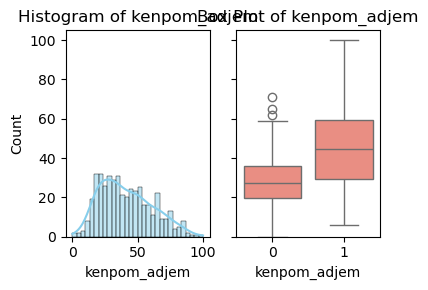

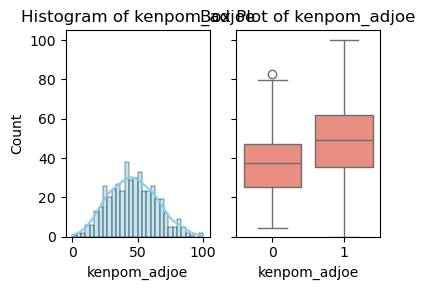

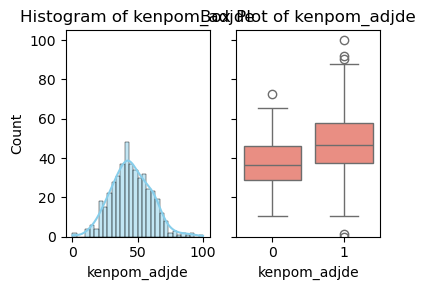

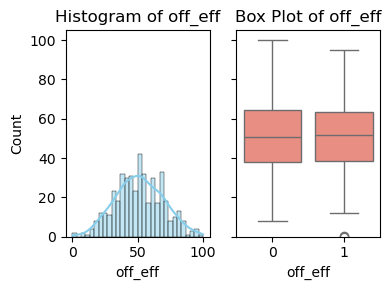

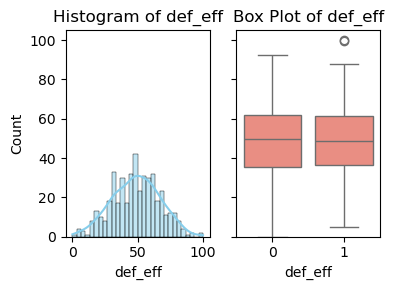

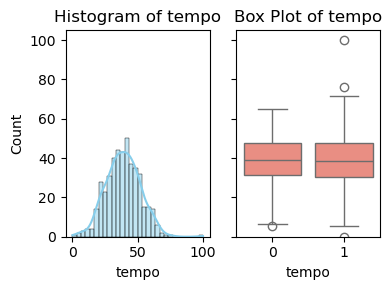

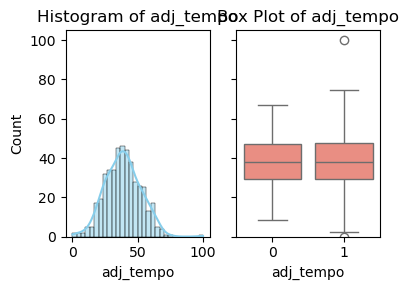

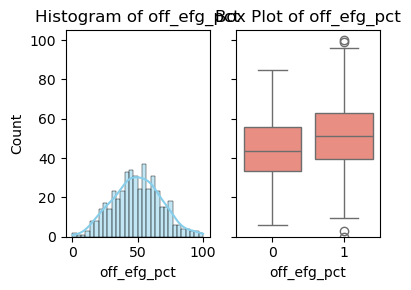

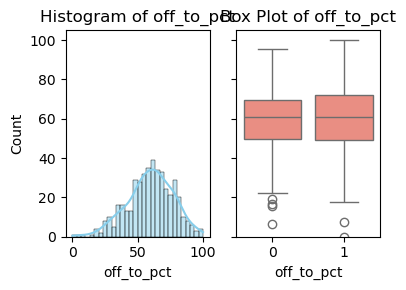

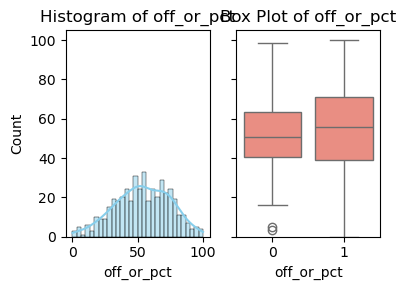

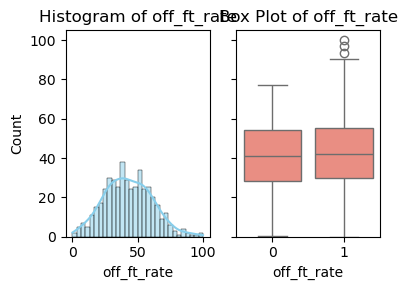

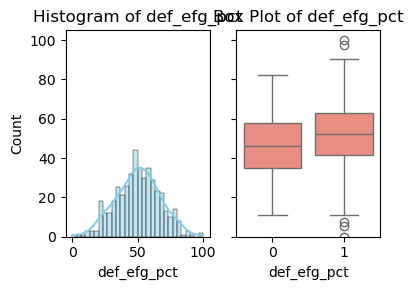

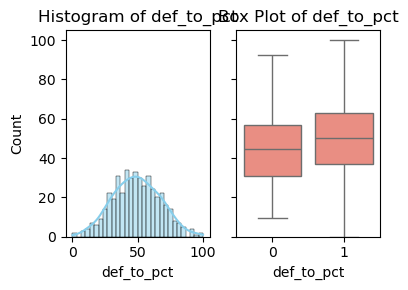

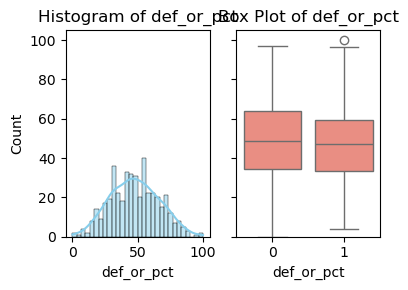

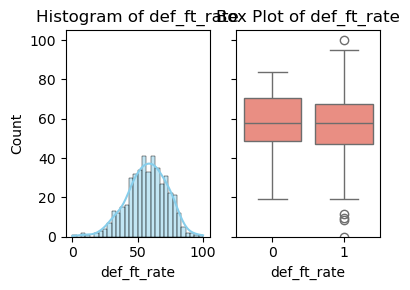

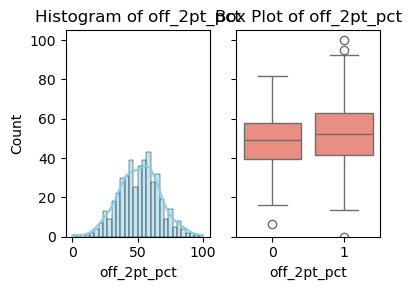

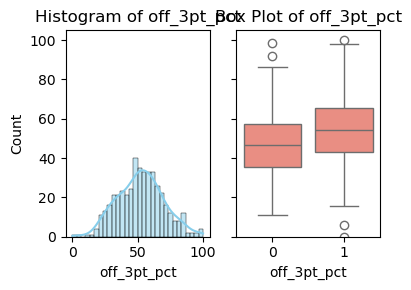

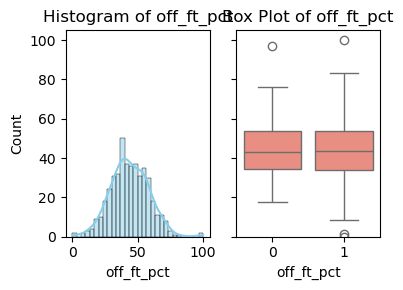

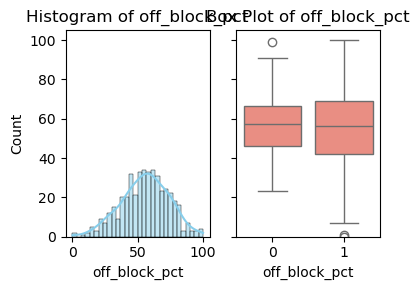

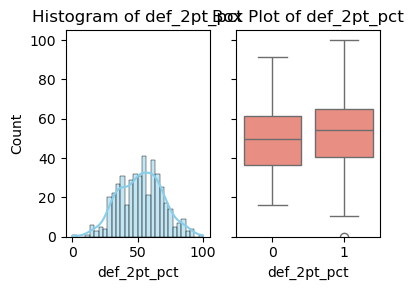

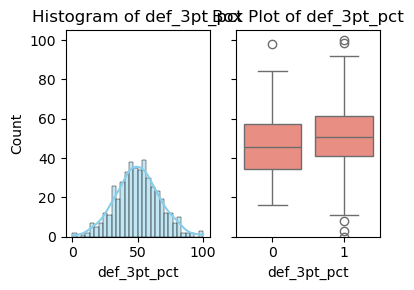

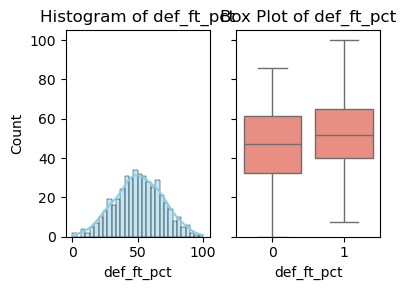

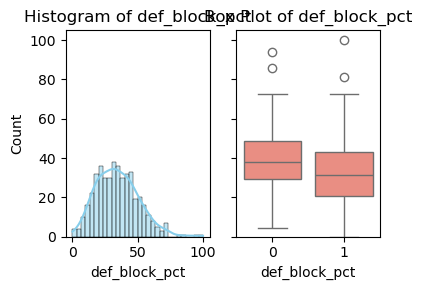

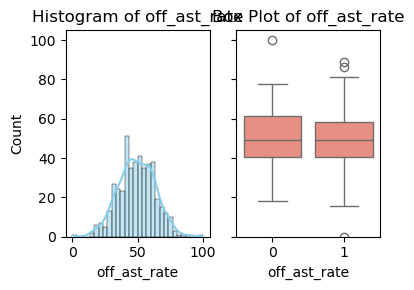

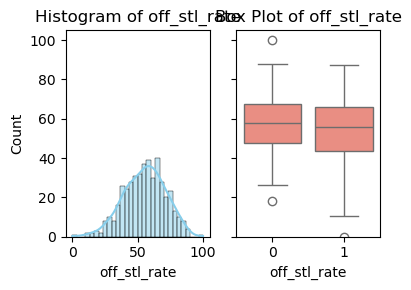

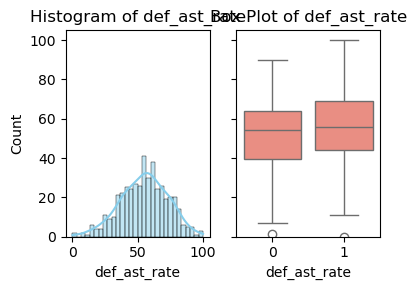

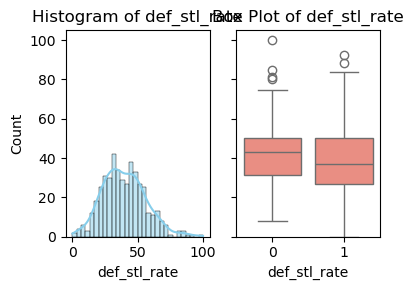

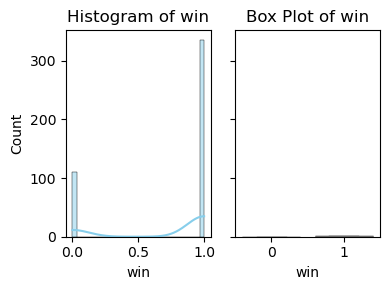

In [43]:
scaler = MinMaxScaler(feature_range=(0,100))
box_df = train_df
numeric_columns = train_df.drop(columns=['win']).columns
box_df[numeric_columns] = scaler.fit_transform(box_df[numeric_columns])

for column in box_df.columns:
    fig, axes = plt.subplots(1, 2, figsize=(4, 3), sharey=True)

    # Histogram on the left
    sns.histplot(box_df[column], kde=True, ax=axes[0], color='skyblue', bins=30)
    axes[0].set_title(f'Histogram of {column}')
    axes[0].set_xlabel(column)

    # Box plot on the right
    sns.boxplot(x='win', y=column, data=box_df, ax=axes[1], color='salmon')
    axes[1].set_title(f'Box Plot of {column}')
    axes[1].set_xlabel(column)

    # Adjust layout and show the plots
    plt.tight_layout()
    plt.show()

### B. Correlation

In [44]:
corr_matrix = train_df.corr()
correlation_with_target = round(abs(corr_matrix['win'])*100,2)
correlation_with_target = correlation_with_target[correlation_with_target >= 10]
print(correlation_with_target)

kenpom_adjem      37.51
kenpom_adjoe      28.40
kenpom_adjde      28.00
off_efg_pct       15.69
def_efg_pct       13.82
def_to_pct        14.88
off_3pt_pct       17.15
def_2pt_pct       11.02
def_ft_pct        12.72
def_block_pct     20.82
off_stl_rate      10.32
win              100.00
Name: win, dtype: float64


### C. Statistical Tests

In [45]:
X = train_df[['kenpom_adjem', 'kenpom_adjoe', 'kenpom_adjde', 'off_eff',
       'def_eff', 'tempo', 'adj_tempo', 'off_efg_pct', 'off_to_pct',
       'off_or_pct', 'off_ft_rate', 'def_efg_pct', 'def_to_pct', 'def_or_pct',
       'def_ft_rate', 'off_2pt_pct', 'off_3pt_pct', 'off_ft_pct',
       'off_block_pct', 'def_2pt_pct', 'def_3pt_pct', 'def_ft_pct',
       'def_block_pct', 'off_ast_rate', 'off_stl_rate', 'def_ast_rate',
       'def_stl_rate']]
#X = train_df.drop('win', axis=1)
y = train_df['win']

# ANOVA
f_values, p_values = f_classif(X, y)
# Mutual Information
mi = mutual_info_regression(X, y)

column_names = np.array(X.columns)
stats_df = pd.DataFrame({
    'feature': column_names,
    'f_values': f_values,
    'p_values': p_values,
    'mutual_info': mi
})
stats_df

,feature,f_values,p_values,mutual_info
0,kenpom_adjem,72.678938,2.410809e-16,0.063541
1,kenpom_adjoe,38.939357,1.021282e-09,0.041527
2,kenpom_adjde,37.757106,1.783657e-09,0.064547
3,off_eff,0.124384,7.244948e-01,0.010945
4,def_eff,0.124384,7.244948e-01,0.010665
5,tempo,0.075789,7.832148e-01,0.000000
6,adj_tempo,0.043289,8.352781e-01,0.000000
7,off_efg_pct,11.203186,8.860346e-04,0.000000
8,off_to_pct,1.609147,2.052764e-01,0.000000
9,off_or_pct,3.314342,6.935084e-02,0.000000


In [46]:
stats_df[stats_df['mutual_info'] > 0]

,feature,f_values,p_values,mutual_info
0,kenpom_adjem,72.678938,2.410809e-16,0.063541
1,kenpom_adjoe,38.939357,1.021282e-09,0.041527
2,kenpom_adjde,37.757106,1.783657e-09,0.064547
3,off_eff,0.124384,7.244948e-01,0.010945
4,def_eff,0.124384,7.244948e-01,0.010665
11,def_efg_pct,8.639253,3.461562e-03,0.015136
12,def_to_pct,10.054431,1.625085e-03,0.011421
15,off_2pt_pct,4.423077,3.601823e-02,0.008043
17,off_ft_pct,0.146679,7.019129e-01,0.010034
18,off_block_pct,1.240235,2.660283e-01,0.028556


In [47]:
stats_df[stats_df['p_values'] < .05]

,feature,f_values,p_values,mutual_info
0,kenpom_adjem,72.678938,2.410809e-16,0.063541
1,kenpom_adjoe,38.939357,1.021282e-09,0.041527
2,kenpom_adjde,37.757106,1.783657e-09,0.064547
7,off_efg_pct,11.203186,8.860346e-04,0.000000
11,def_efg_pct,8.639253,3.461562e-03,0.015136
12,def_to_pct,10.054431,1.625085e-03,0.011421
15,off_2pt_pct,4.423077,3.601823e-02,0.008043
16,off_3pt_pct,13.449181,2.748236e-04,0.000000
19,def_2pt_pct,5.456066,1.994482e-02,0.000000
20,def_3pt_pct,3.872595,4.970250e-02,0.008516


In [48]:
stats_df[stats_df['f_values'] > 5]

,feature,f_values,p_values,mutual_info
0,kenpom_adjem,72.678938,2.410809e-16,0.063541
1,kenpom_adjoe,38.939357,1.021282e-09,0.041527
2,kenpom_adjde,37.757106,1.783657e-09,0.064547
7,off_efg_pct,11.203186,8.860346e-04,0.000000
11,def_efg_pct,8.639253,3.461562e-03,0.015136
12,def_to_pct,10.054431,1.625085e-03,0.011421
16,off_3pt_pct,13.449181,2.748236e-04,0.000000
19,def_2pt_pct,5.456066,1.994482e-02,0.000000
21,def_ft_pct,7.300269,7.158489e-03,0.000000
22,def_block_pct,20.114575,9.299363e-06,0.000000


## II. Wrapper Methods

### A. Forward Selection

In [49]:
# Normalize the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Forward Selection using AIC
def forward_selection_logistic_aic(X_train, y_train, X_test, y_test):
    selected_features = []
    remaining_features = list(X_train.columns)  # Column names
    best_f1_train = 0
    best_f1_test = 0
    best_aic = np.inf  # Start with a large AIC value
    
    while remaining_features:
        aic_list = []
        f1_train_list = []
        f1_test_list = []
        
        for feature in remaining_features:
            current_features = selected_features + [feature]
            X_train_subset = X_train[current_features]
            X_test_subset = X_test[current_features]
            
            # Add constant for intercept (statsmodels requires constant)
            X_train_subset_sm = sm.add_constant(X_train_subset)
            X_test_subset_sm = sm.add_constant(X_test_subset)
            
            # Fit the logistic regression model using statsmodels (to compute AIC)
            model = sm.Logit(y_train, X_train_subset_sm)
            result = model.fit()
            
            aic = result.aic  # Extract AIC value
            aic_list.append(aic)
            
            # Now, use sklearn for F1 score calculation
            log_reg_model = LogisticRegression(solver='liblinear')
            log_reg_model.fit(X_train_subset, y_train)  # Fit model without constant term
            
            # Make predictions on both train and test data
            y_train_pred = log_reg_model.predict(X_train_subset)
            y_test_pred = log_reg_model.predict(X_test_subset)
            
            # Calculate F1 scores
            f1_train = f1_score(y_train, y_train_pred)
            f1_test = f1_score(y_test, y_test_pred)
            
            f1_train_list.append(f1_train)
            f1_test_list.append(f1_test)
        
        # Select the feature that gives the lowest AIC
        best_feature_idx = np.argmin(aic_list)
        selected_features.append(remaining_features[best_feature_idx])
        remaining_features.remove(remaining_features[best_feature_idx])
        
        best_aic = aic_list[best_feature_idx]
        best_f1_train = f1_train_list[best_feature_idx]
        best_f1_test = f1_test_list[best_feature_idx]
        
    return selected_features, best_aic, best_f1_train, best_f1_test

# Perform forward selection using AIC
selected_features, best_aic, best_f1_train, best_f1_test = forward_selection_logistic_aic(
    X_train, y_train, X_test, y_test
)

# Output the results
print("Selected Features:", selected_features)
print("Best AIC:", best_aic)
print("Best F1 Score on Training Set:", best_f1_train)
print("Best F1 Score on Test Set:", best_f1_test)

# Create the final Logistic Regression model using selected features
log_reg_final = LogisticRegression(solver='liblinear')
X_train_final = X_train[selected_features]
X_test_final = X_test[selected_features]

# Fit the final model
log_reg_final.fit(X_train_final, y_train)

# Make predictions on training and testing sets
y_train_pred_final = log_reg_final.predict(X_train_final)
y_test_pred_final = log_reg_final.predict(X_test_final)

# Evaluate using F1 score
final_f1_train = f1_score(y_train, y_train_pred_final)
final_f1_test = f1_score(y_test, y_test_pred_final)

print("Final F1 Score on Training Set:", final_f1_train)
print("Final F1 Score on Test Set:", final_f1_test)

Optimization terminated successfully.
         Current function value: 0.478080
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.518206
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.519193
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.560960
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.560960
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.561015
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.561051
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.548583
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.559305
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.557406
  

### B. Recursive Feature Elimination

In [50]:
# Convert scaled data back to DataFrame to keep track of column names
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

# Create a Logistic Regression model
log_reg = LogisticRegression(solver='liblinear')

# Initialize RFE with logistic regression as the model and the number of features to select
rfe = RFE(estimator=log_reg, n_features_to_select=12)  # Select top 12 features

# Fit RFE on the scaled training data
rfe.fit(X_train_scaled, y_train)

# Get the selected features (column names)
selected_features = X_train_scaled.columns[rfe.support_]
print("Selected Features:", selected_features)

# Train a logistic regression model using only the selected features
log_reg.fit(X_train_scaled[selected_features], y_train)

# Make predictions on both training and testing datasets
y_train_pred = log_reg.predict(X_train_scaled[selected_features])
y_test_pred = log_reg.predict(X_test_scaled[selected_features])

# Evaluate the F1 score on both training and testing datasets
f1_train = f1_score(y_train, y_train_pred)
f1_test = f1_score(y_test, y_test_pred)

# Output the results
print("F1 Score on Training Set:", f1_train)
print("F1 Score on Test Set:", f1_test)

Selected Features: Index(['kenpom_adjem', 'kenpom_adjoe', 'kenpom_adjde', 'off_efg_pct',
       'off_to_pct', 'def_efg_pct', 'def_to_pct', 'off_2pt_pct', 'off_3pt_pct',
       'def_2pt_pct', 'def_block_pct', 'off_ast_rate'],
      dtype='object')
F1 Score on Training Set: 0.8571428571428571
F1 Score on Test Set: 0.7676056338028169


### C. Lasso Regression

In [51]:
# Create a Lasso Logistic Regression model (penalty='l1' for Lasso)
lasso_log_reg = LogisticRegression(solver='liblinear', penalty='l1', max_iter=1000)

# Fit the model on the training data
lasso_log_reg.fit(X_train_scaled, y_train)

# Make predictions on both training and testing datasets
y_train_pred = lasso_log_reg.predict(X_train_scaled)
y_test_pred = lasso_log_reg.predict(X_test_scaled)

# Evaluate the F1 score on both training and testing datasets
f1_train = f1_score(y_train, y_train_pred)
f1_test = f1_score(y_test, y_test_pred)

# Output the results
print("F1 Score on Training Set:", f1_train)
print("F1 Score on Test Set:", f1_test)

# Get the non-zero coefficients (selected features) from the Lasso model
selected_features = X.columns[(lasso_log_reg.coef_ != 0).flatten()]
print("Selected Features (Columns used in the model):", selected_features)

F1 Score on Training Set: 0.8595271210013908
F1 Score on Test Set: 0.7703180212014135
Selected Features (Columns used in the model): Index(['kenpom_adjem', 'tempo', 'off_to_pct', 'off_or_pct', 'off_ft_rate',
       'def_efg_pct', 'def_to_pct', 'def_or_pct', 'def_ft_rate', 'off_3pt_pct',
       'off_ft_pct', 'off_block_pct', 'def_2pt_pct', 'def_ft_pct',
       'def_block_pct', 'off_ast_rate', 'off_stl_rate', 'def_ast_rate',
       'def_stl_rate'],
      dtype='object')


## III. Tree Methods

### A. Decision Tree Information Gain

In [52]:
X_train_scaled = scaler.fit_transform(X_train)  # Scaled training features
X_test_scaled = scaler.transform(X_test)  # Scaled test features

# Create a Decision Tree Classifier model
decision_tree = DecisionTreeClassifier(random_state=42)

# Fit the model on the training data
decision_tree.fit(X_train_scaled, y_train)

# Make predictions on both training and testing datasets
y_train_pred = decision_tree.predict(X_train_scaled)
y_test_pred = decision_tree.predict(X_test_scaled)

# Evaluate the F1 score on both training and testing datasets
f1_train = f1_score(y_train, y_train_pred)
f1_test = f1_score(y_test, y_test_pred)

# Output the F1 scores
print("F1 Score on Training Set:", f1_train)
print("F1 Score on Test Set:", f1_test)

# Get feature importances (information gain)
feature_importances = decision_tree.feature_importances_

# Get the selected features based on their importance (non-zero importance)
selected_features = X.columns[feature_importances > 0]
print("Selected Features (Columns used in the model):", selected_features)

F1 Score on Training Set: 1.0
F1 Score on Test Set: 0.7238805970149254
Selected Features (Columns used in the model): Index(['kenpom_adjem', 'kenpom_adjoe', 'kenpom_adjde', 'def_eff', 'tempo',
       'off_efg_pct', 'off_to_pct', 'off_or_pct', 'off_ft_rate', 'def_efg_pct',
       'def_to_pct', 'def_ft_rate', 'off_2pt_pct', 'off_3pt_pct', 'off_ft_pct',
       'off_block_pct', 'def_2pt_pct', 'def_3pt_pct', 'def_ft_pct',
       'off_ast_rate', 'def_ast_rate', 'def_stl_rate'],
      dtype='object')


### B. Random Forest

In [53]:
# Create a Random Forest Classifier model
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model on the training data
random_forest.fit(X_train_scaled, y_train)

# Make predictions on both training and testing datasets
y_train_pred = random_forest.predict(X_train_scaled)
y_test_pred = random_forest.predict(X_test_scaled)

# Evaluate the F1 score on both training and testing datasets
f1_train = f1_score(y_train, y_train_pred)
f1_test = f1_score(y_test, y_test_pred)

# Output the F1 scores
print("F1 Score on Training Set:", f1_train)
print("F1 Score on Test Set:", f1_test)

# Get feature importances (information gain)
feature_importances = random_forest.feature_importances_

# Get the columns (features) that were selected (those with non-zero importance)
selected_features = X.columns[feature_importances > .02]
print("Selected Features (Columns used in the model):", selected_features)

F1 Score on Training Set: 1.0
F1 Score on Test Set: 0.7946127946127947
Selected Features (Columns used in the model): Index(['kenpom_adjem', 'kenpom_adjoe', 'kenpom_adjde', 'off_eff', 'def_eff',
       'tempo', 'adj_tempo', 'off_efg_pct', 'off_to_pct', 'off_or_pct',
       'off_ft_rate', 'def_efg_pct', 'def_to_pct', 'def_or_pct', 'def_ft_rate',
       'off_2pt_pct', 'off_3pt_pct', 'off_ft_pct', 'off_block_pct',
       'def_2pt_pct', 'def_3pt_pct', 'def_ft_pct', 'def_block_pct',
       'off_ast_rate', 'off_stl_rate', 'def_ast_rate', 'def_stl_rate'],
      dtype='object')


### C. Extra Tree

In [54]:
# Create an Extra Trees Classifier model
extra_trees = ExtraTreesClassifier(n_estimators=100, random_state=42)

# Fit the model on the training data
extra_trees.fit(X_train_scaled, y_train)

# Make predictions on both training and testing datasets
y_train_pred = extra_trees.predict(X_train_scaled)
y_test_pred = extra_trees.predict(X_test_scaled)

# Evaluate the F1 score on both training and testing datasets
f1_train = f1_score(y_train, y_train_pred)
f1_test = f1_score(y_test, y_test_pred)

# Output the F1 scores
print("F1 Score on Training Set:", f1_train)
print("F1 Score on Test Set:", f1_test)

# Get feature importances (information gain)
feature_importances = extra_trees.feature_importances_

F1 Score on Training Set: 1.0
F1 Score on Test Set: 0.7947882736156352


In [55]:
column_names = X_train.columns
tree_df = pd.DataFrame({
    'feature': column_names,
    'importance': feature_importances
})
tree_df
#tree_df.to_csv('tree.csv')

,feature,importance
0,kenpom_adjem,0.075589
1,kenpom_adjoe,0.060615
2,kenpom_adjde,0.053726
3,off_eff,0.030334
4,def_eff,0.031021
5,tempo,0.027634
6,adj_tempo,0.031964
7,off_efg_pct,0.031908
8,off_to_pct,0.031338
9,off_or_pct,0.028069


# IV. Exhaustive Feature Selection

In [56]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

X_train_scaled2 = X_train_scaled[[
'kenpom_adjem',
'def_efg_pct',
'def_to_pct',
'kenpom_adjoe',
'kenpom_adjde',
'off_3pt_pct',
'def_2pt_pct',
'off_efg_pct',
'def_block_pct',
'off_2pt_pct',
'def_ast_rate',
'def_3pt_pct',
'off_ast_rate',
'off_to_pct',
'off_ft_pct',
'off_block_pct'
]]

X_test_scaled2 = X_test_scaled[[
'kenpom_adjem',
'def_efg_pct',
'def_to_pct',
'kenpom_adjoe',
'kenpom_adjde',
'off_3pt_pct',
'def_2pt_pct',
'off_efg_pct',
'def_block_pct',
'off_2pt_pct',
'def_ast_rate',
'def_3pt_pct',
'off_ast_rate',
'off_to_pct',
'off_ft_pct',
'off_block_pct'
]]

In [57]:
# Initialize variables to track the best model
best_f1 = 0
best_features = []
best_train_f1 = 0

# Iterate over all possible subsets of features
for k in range(1, len(X_train_scaled2.columns) + 1):
    for subset in combinations(X_train_scaled2.columns, k):
        X_train_subset = X_train_scaled2[list(subset)]
        X_test_subset = X_test_scaled2[list(subset)]
        
        # Train the model with the subset of features
        log_reg.fit(X_train_subset, y_train)
        
        # Make predictions on the test set
        y_test_pred = log_reg.predict(X_test_subset)
        test_f1 = f1_score(y_test, y_test_pred)
        
        # Make predictions on the training set
        y_train_pred = log_reg.predict(X_train_subset)
        train_f1 = f1_score(y_train, y_train_pred)
        
        # Track the best subset based on test F1 score
        if test_f1 > best_f1:
            best_f1 = test_f1
            best_features = subset
            best_train_f1 = train_f1

# Output the best feature subset and the F1 scores
print(f"Best Feature Subset: {best_features}")
print(f"Best Test F1 Score: {best_f1:.4f}")
print(f"Training F1 Score of Best Model: {best_train_f1:.4f}")

Best Feature Subset: ('def_to_pct', 'kenpom_adjoe', 'off_2pt_pct', 'off_to_pct', 'off_ft_pct')
Best Test F1 Score: 0.8322
Training F1 Score of Best Model: 0.8448


### V. Principal Components Analysis

In [68]:
from sklearn.decomposition import PCA
import plotly_express as px
import plotly.graph_objects as go

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [69]:
shape = X_train_scaled.shape
pca = PCA(n_components=shape[1])
pca_array2 = pca.fit_transform(X_train_scaled)

Explained variance:  [6.13620090e+00 3.69115912e+00 2.70206892e+00 2.10671003e+00
 1.75866881e+00 1.57553533e+00 1.31458388e+00 9.92304751e-01
 8.95094700e-01 8.27924988e-01 7.84338219e-01 7.34645705e-01
 6.67181603e-01 6.06624211e-01 5.33122535e-01 4.49427561e-01
 3.64303419e-01 3.11214545e-01 2.33909328e-01 2.12169951e-01
 7.10263464e-02 5.55415856e-02 2.97176510e-02 3.98200664e-03
 3.21804882e-03 7.88647218e-10 2.23789453e-32]
Explained variance ratio:  [2.26757134e-01 1.36403073e-01 9.98522397e-02 7.78513506e-02
 6.49898372e-02 5.82223238e-02 4.85791253e-02 3.66696242e-02
 3.30773245e-02 3.05951353e-02 2.89844301e-02 2.71480932e-02
 2.46550252e-02 2.24171877e-02 1.97010071e-02 1.66081436e-02
 1.34624665e-02 1.15006205e-02 8.64388398e-03 7.84052717e-03
 2.62470720e-03 2.05248344e-03 1.09818591e-03 1.47151051e-04
 1.18919758e-04 2.91436649e-11 8.26991417e-34]
Cumulative explained variance ratio:  [0.22675713 0.36316021 0.46301245 0.5408638  0.60585363 0.66407596
 0.71265508 0.7493247

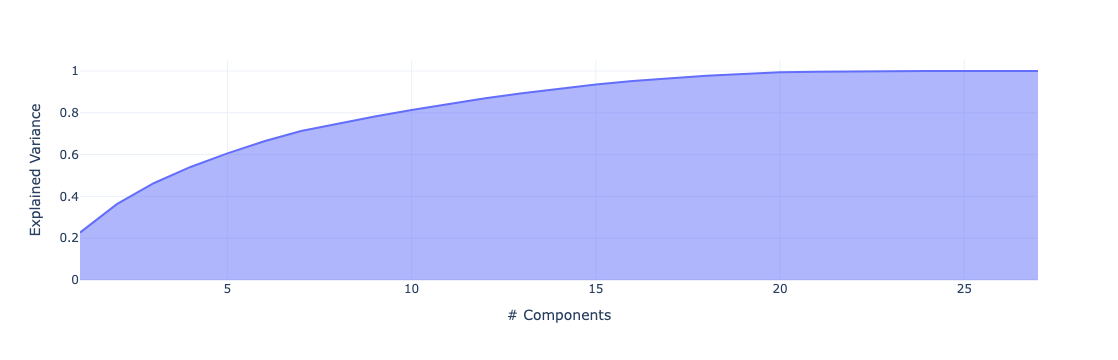

In [70]:
### Explained Variance ###
print("Explained variance: ", pca.explained_variance_)
print("Explained variance ratio: ", pca.explained_variance_ratio_)
print("Cumulative explained variance ratio: ", np.cumsum(pca.explained_variance_ratio_))

### Visualize ###
exp_var_cumul = np.cumsum(pca.explained_variance_ratio_)

px.area(
    x = range(1, exp_var_cumul.shape[0] + 1),
    y = exp_var_cumul,
    template = "plotly_white",
    labels = {"x": "# Components",
              "y": "Explained Variance"})

In [98]:
# PCA on training set
pca_train = pd.DataFrame(pca_array2)
pca_train = pca_train.loc[:, 0:2]
pca_train.columns = ['PC1', 'PC2', 'PC3']
# Run Logistic Regression on PCA dataframe
model = LogisticRegression()
model.fit(pca_train, y_train)
y_train_pred = model.predict(pca_train)
f1_train = f1_score(y_train, y_train_pred)
f1_train

0.8571428571428571

In [99]:
# PCA on training set
pca_test_array = pca.transform(X_test_scaled)
pca_test_df = pd.DataFrame(pca_test_array)
pca_test = pca_test_df.loc[:, 0:2]
pca_test.columns = ['PC1', 'PC2', 'PC3']
# Run Logistic Regression on PCA dataframe
y_test_pred = model.predict(pca_test)
f1_test = f1_score(y_test, y_test_pred)
f1_test

0.7948717948717949